# Simple harmonic oscillator simulation classes

Classes for simulating the motion of a mass on a spring

## Define the simulation class for a Hamonic Oscillator and a function to call it

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class SimpleHarmonicOscillator:
    # Set initial conditions and constants during object construction
    def __init__(self, x, v, k):
        self.x = x
        self.v = v
        self.k = k

    # Function to move the simulation forward in time 1 step (step size is an input)
    def step( self, dt = 0.001 ):
        # Resolve forces
        F = -self.k*self.x
        # Update velocty based on force
        self.v = self.v + dt*F
        # Update position based on velocity
        self.x = self.x + dt * self.v
        # Return the new X position for plotting with
        return self.x

def PlotSimpleHarmonicOscillator(x , v , k , n ):
    # Construct the simulation and assign it to the variable 'a'
    a = SimpleHarmonicOscillator(x, v , k )
    # Time step size
    dt = 0.0001
    # Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
    X = np.zeros((n,))
    T = np.zeros((n,))
    # Run the simulation for n steps
    for i in range(n):
        X[i] = a.step(dt)
        T[i] = i*dt
    # Plot Time vs X position and add label for legend
    plt.plot(T,X, label = 'k={0:.1f}'.format(k))

### Experiment with the spring constant in a simple harmonic oscillator

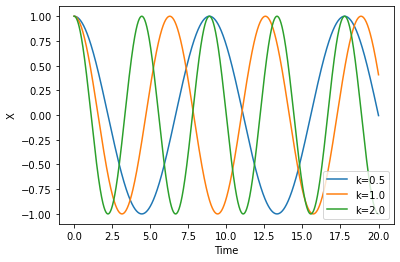

In [2]:
PlotSimpleHarmonicOscillator(x = 1., v = 0., k = 0.5, n = 200000)
PlotSimpleHarmonicOscillator(x = 1., v = 0., k = 1., n = 200000)
PlotSimpleHarmonicOscillator(x = 1., v = 0., k = 2., n = 200000)

plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

## Define the simulation class for a Damped Hamonic Oscillator and a function to call it

In [3]:
class DampedHarmonicOscillator:
    # Set initial conditions and constants during object construction
    def __init__(self, x, v, k,gamma):
        self.x = x
        self.v = v
        self.k = k
        self.gamma = gamma

    # Function to move the simulation forward in time 1 step (step size is an input)
    def step( self, dt = 0.001 ):
        # Resolve forces
        F = -self.k*self.x - self.gamma*self.v
        # Update velocty based on force
        self.v = self.v + dt*F
        # Update position based on velocity
        self.x = self.x + dt * self.v
        # Return the new X position for plotting with
        return self.x

def PlotDampedHarmonicOscillator(x , v , k , gamma, n ):
    # Construct the simulation and assign it to the variable 'a'
    a = DampedHarmonicOscillator(x, v , k , gamma )
    # Time step size
    dt = 0.0001
    # Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
    X = np.zeros((n,))
    T = np.zeros((n,))
    # Run the simulation for n steps
    for i in range(n):
        X[i] = a.step(dt)
        T[i] = i*dt
    # Plot Time vs X position and add label for legend
    plt.plot(T,X, label = 'k={0:.1f} \u0263={1:.1f}'.format(k,gamma))

### Experiment with the damping factor in a damped harmonic oscilator

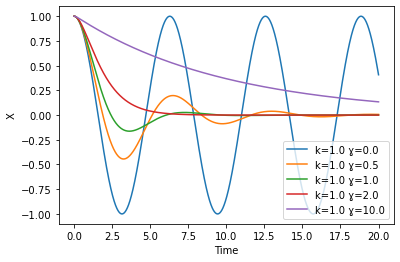

In [4]:
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0, n = 200000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, n = 200000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 1, n = 200000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 2, n = 200000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 10, n = 200000)
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

#### Repeat the same work, but use a for loop instead of repeating ourselves

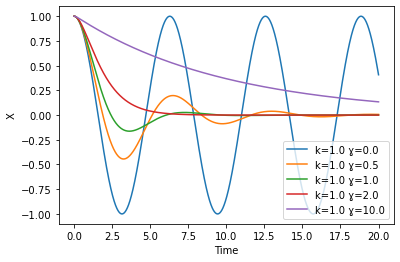

In [5]:
for g in [ 0., 0.5, 1., 2., 10 ]:
    PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = g, n = 200000)
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()


## Define the simulation class for a Forced, Damped, Hamonic Oscillator and a function to call it

In [6]:
class ForcedDampedHarmonicOscillator:
    def __init__(self, x, v, k,gamma,F_0, omega):
        # Set initial conditions and constants during object construction
        self.x = x
        self.v = v
        self.k = k
        self.gamma = gamma
        self.F_0 = F_0
        self.omega = omega

    # Function to move the simulation forward in time 1 step (step size is an input)
    def step( self, dt = 0.001 , t = 0):
        # Resolve forces
        F = -self.k*self.x - self.gamma*self.v + self.F_0 * np.cos ( self.omega * t )
        # Update velocty based on force
        self.v = self.v + dt*F
        # Update position based on velocity
        self.x = self.x + dt * self.v
        # Return the new X position for plotting with
        return self.x


def PlotForcedDampedHarmonicOscillator(x , v , k , gamma, F_0 , omega , n ):
    # Construct the simulation and assign it to the variable 'a'
    a = ForcedDampedHarmonicOscillator(x, v , k , gamma, F_0 , omega )
    # Time step size
    dt = 0.0001
    # Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
    X = np.zeros((n,))
    T = np.zeros((n,))
    # Run the simulation for n steps
    for i in range(n):
        X[i] = a.step(dt, i*dt)
        T[i] = i*dt
    # Plot Time vs X position and add label for legend
    plt.plot(T,X, label = 'k={0:.1f} \u0263={1:.1f} F_0={2:.1f} \u03C9={3:.1f}'.format(k,gamma,F_0,omega))

### Experiment with the damping factor of a forced, damped, harmonic oscillator

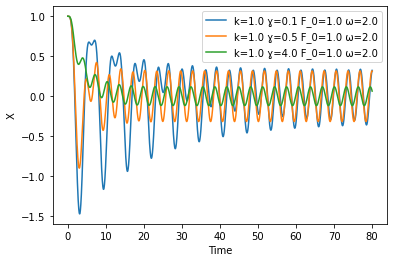

In [7]:

PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.1, F_0 = 1, omega = 2,n = 800000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 2,n = 800000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 4, F_0 = 1, omega = 2,n = 800000)

plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

### Experiment with the driving frequency of a forced, damped harmonic oscillaltor

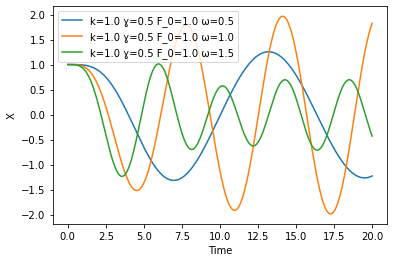

In [8]:

PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 0.5,n = 200000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 1,n = 200000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 1.5,n = 200000)

plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

### Plot data

In [9]:

#PlotSim(x = 1., v = 0., k = 1., gamma = 1, F_0 = 1, omega = 2,n = 800000)
#PlotSim(x = 1., v = 0., k = 1., gamma = 2, F_0 = 1, omega = 2,n = 200000)

#PlotSim(x = 1., v = 0., k = 1., gamma = 10, F_0 = 1, omega = 2,n = 2000000)


#PlotSim(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 2, omega = 1.5,n = 200000)

def PlotOscillator(A, omega, phi):
    t = np.arange(0, 3 * np.pi, 0.1)
    x = A*np.cos(omega*t + phi)
    plt.plot(t, x, label='A=' + str(A)+' \u03C9={0:.1f}'.format(omega) )

def PlotDamped(A , omega , phi , gamma ):
    t = np.arange(0, 3 * np.pi, 0.1)
    x = A*np.exp(-gamma*t)*np.cos(omega*t + phi)
    plt.plot(t, x, label='A=' + str(A)+' \u03C9={0:.1f} \u03BB={1:0.1f}'.format(omega,gamma) )

def PlotDriven(F_0, omega, omega_0, gamma, m):
    A = (F_0 / m) / np.sqrt( pow(omega_0*omega_0 - omega*omega,2) + pow((gamma / m) *omega,2))
    t = np.arange(0, 3 * np.pi, 0.1)
    phi = np.arctan( gamma * omega / ( m * ( omega_0*omega_0* - omega*omega)))
    x = A*np.cos(omega*t + phi)
    plt.plot(t, x, label='F_0=' + str(F_0)+' \u03C9={0:.1f} \u03C9_0={1:.01f} u03BB={2:0.1f}  m={3:.1f}'.format(omega,omega_0,gamma,m) )
    
#Plot Harmonic Examples
#PlotOscillator(A = 1.0, omega = 0.5 * np.pi, phi = 0)

#Plot Damped examples
#for x in [ 0.01, 0.25, 1, 2,  1/0.7* np.pi,1]:
#    PlotDamped(A  = 1.0, omega = 0.7* np.pi, phi = 0, gamma = x)

#Plot Driven, Damped Examples
#for x in [0.1, 2, 3]:
#   PlotDriven(F_0 = 1.0, omega = x * np.pi, omega_0 = 1 * np.pi, gamma = 1, m = 1)

#for x in [0.1, 2, 3]:
#    PlotDriven(F_0 = 1.0, omega = 0.7 * np.pi, omega_0 = 1 * np.pi, gamma = x,  m = 1)

